In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.ensemble import ExtraTreesRegressor ## Feature Importance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score, adjusted_rand_score
from sklearn import metrics

In [2]:
df=pd.read_csv(r"C:\Users\marwa\Downloads\car data.csv")

In [3]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.shape

(301, 9)

In [6]:
for i in df:
    if i in ['Year', 'Fuel_Type', 'Seller_Type', 'Transmission','Owner']:
        print("Unique values for",i, "--->" ,df[i].unique(), ",and those are total :", df[i].nunique(), end = "\n\n") 

Unique values for Year ---> [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007] ,and those are total : 16

Unique values for Fuel_Type ---> ['Petrol' 'Diesel' 'CNG'] ,and those are total : 3

Unique values for Seller_Type ---> ['Dealer' 'Individual'] ,and those are total : 2

Unique values for Transmission ---> ['Manual' 'Automatic'] ,and those are total : 2

Unique values for Owner ---> [0 1 3] ,and those are total : 3



In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checkign Statistical values 
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# Removing "Car_Name" in new dataset as its not required for current scenario as it would not help much in prediction the preuce of car as car has a unique name.
df1=df.drop(columns='Car_Name',axis=1)

In [10]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
# Creating new column to get new derived column from 'Year' and 'Current_Year' as "No_Of_Year"
df1['Current_Year']=2025

In [12]:
df1['No_Of_Year']=df1['Current_Year']-df1['Year']

In [13]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2025,11
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2025,12
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2025,8
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2025,14
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2025,11


In [14]:
# Dropping 'Year' and 'Current_Year' as those won't be the measure used for prediction of price
df1.drop(columns=(['Year', 'Current_Year']), axis = 1, inplace = True)

In [15]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [16]:
# Using One-Hot Encoding to convert categorical variables into numerical format
df1=pd.get_dummies(df1,drop_first=True)

In [17]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


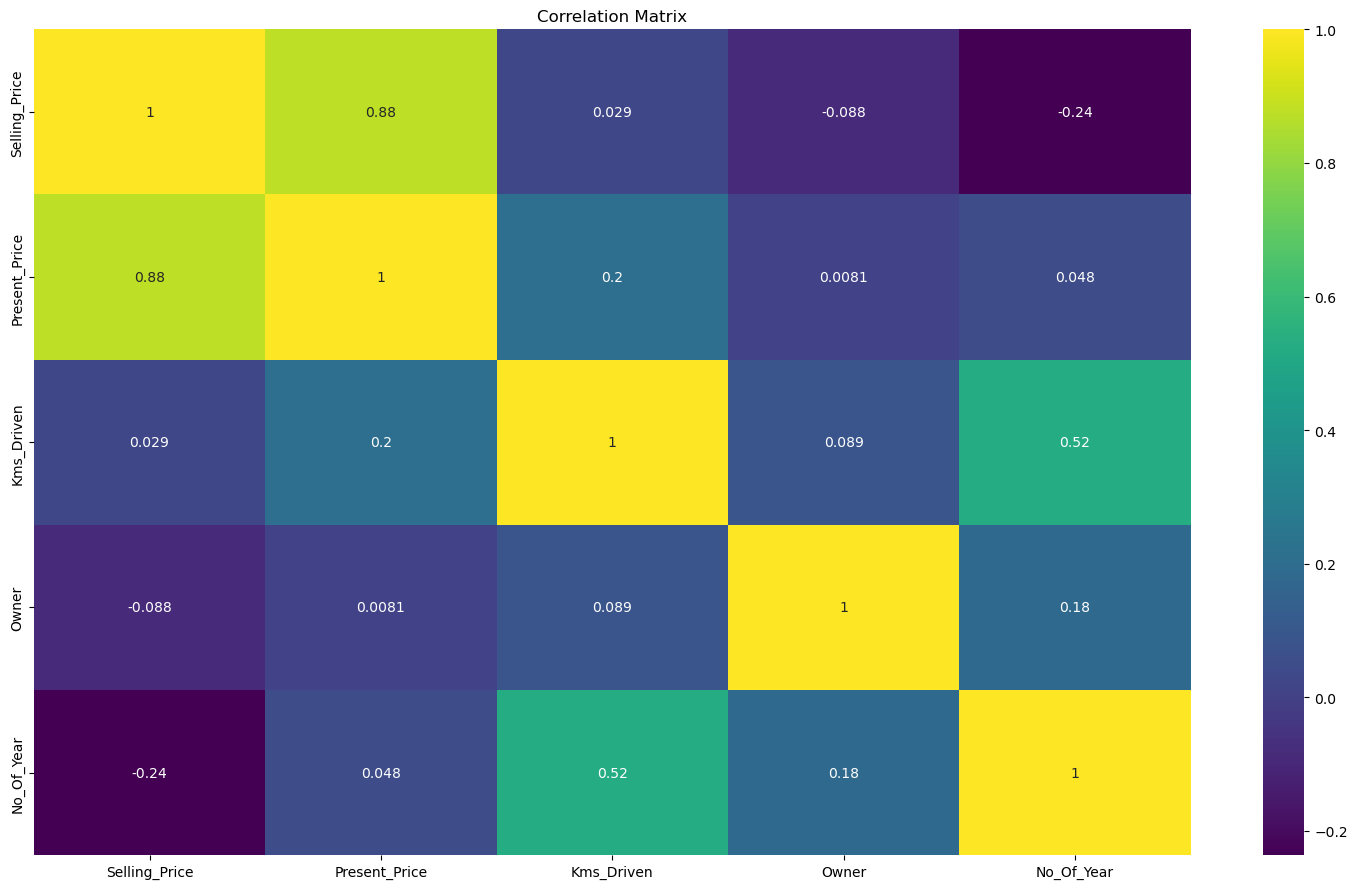

In [18]:
plt.figure(figsize=(15,9))
sns.heatmap(data=df1.select_dtypes(include='number').corr(),
annot=True,
cmap='viridis' )
# Add title for context
plt.title('Correlation Matrix')
# Adjust layout to prevent clipping
plt.tight_layout()
# Display the heatmap
plt.show()

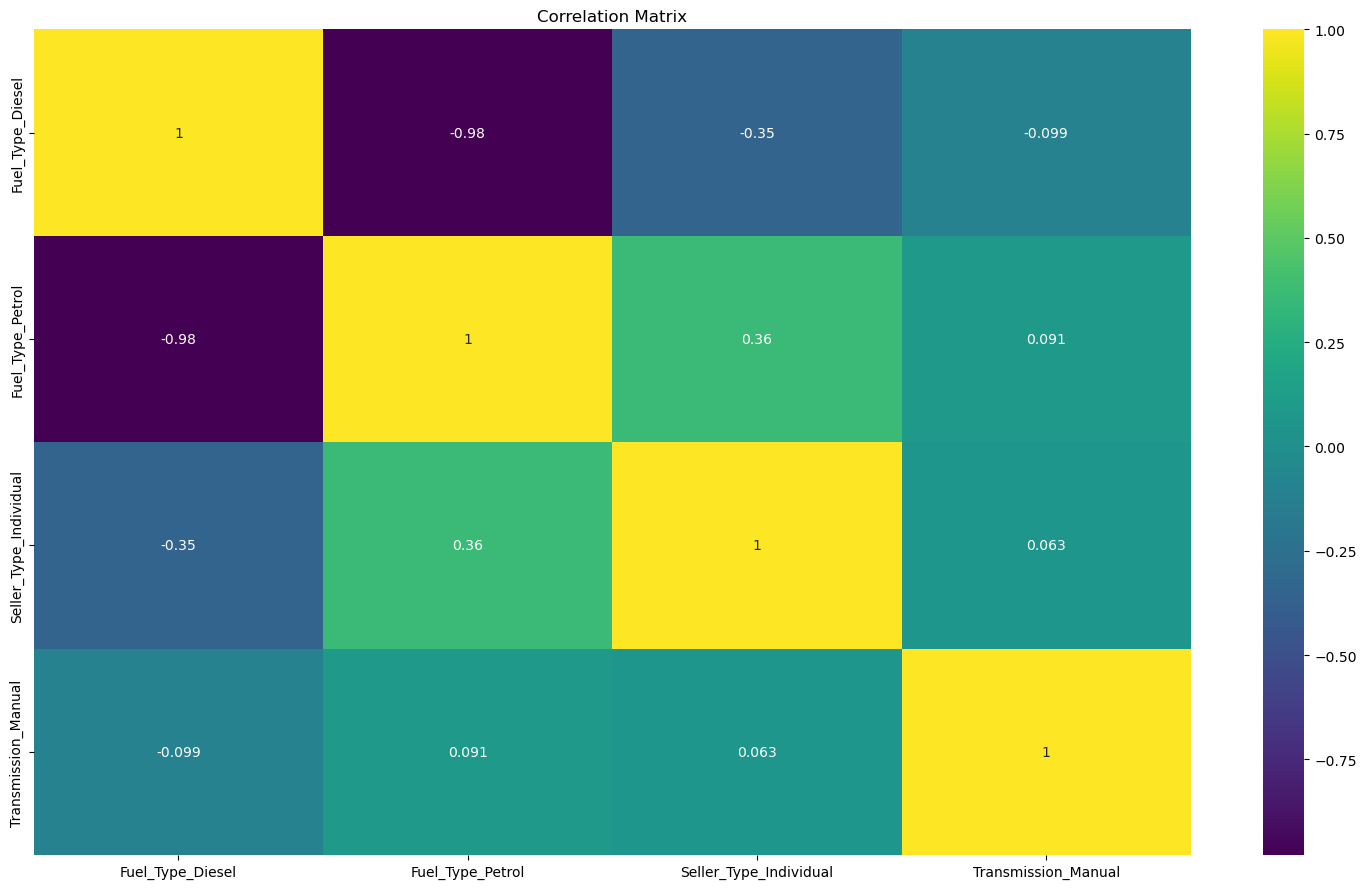

In [19]:
plt.figure(figsize=(15,9))
sns.heatmap(data=df1.select_dtypes(exclude=['number']).corr(),
annot=True,
cmap='viridis' )
# Add title for context
plt.title('Correlation Matrix')
# Adjust layout to prevent clipping
plt.tight_layout()
# Display the heatmap
plt.show()

In [20]:
#Training the model
#Splitting the data into train_test_split model
X = df1.drop("Selling_Price", axis = 1)
y=df1['Selling_Price']

In [21]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
print(feature_importance)

Present_Price             0.382356
Kms_Driven                0.040942
Owner                     0.000855
No_Of_Year                0.079799
Fuel_Type_Diesel          0.215219
Fuel_Type_Petrol          0.016525
Seller_Type_Individual    0.136422
Transmission_Manual       0.127882
dtype: float64


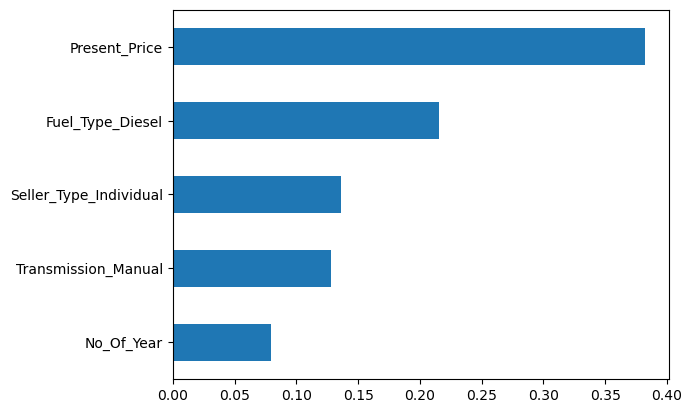

In [23]:
# Plotting the top 5 important features available
feature_importance.nlargest(5).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [24]:
x_train, x_test, y_train, y_test =train_test_split(X,y ,test_size=0.2, random_state=10)

In [25]:
#Training the model - Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
# Predicting values for x_test
y_pred =lr.predict(x_test)

In [27]:
y_pred[0:10]

array([ 7.78311122,  0.80492133,  1.88830514,  2.05092328,  5.25115027,
        6.80264993, 19.67617202, -3.31906928,  1.01503656,  4.40955539])

In [28]:
# Verfying the test values with above predicted values
print(list(y_test[:10]))

[8.4, 0.5, 2.55, 0.9, 4.8, 4.75, 19.99, 0.2, 0.75, 3.9]


In [29]:
print(mean_squared_error(y_test,y_pred))

5.075348220392656


In [30]:
print ('MSE---->',metrics.mean_squared_error(y_pred,y_test))
print ('RMSE---->',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

MSE----> 5.075348220392656
RMSE----> 2.252853350840364


In [31]:
print(r2_score(y_test, y_pred))

0.8436773164235081


C:\Users\marwa\AppData\Local\Temp\ipykernel_21920\2332411778.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


<Axes: xlabel='Selling_Price', ylabel='Density'>

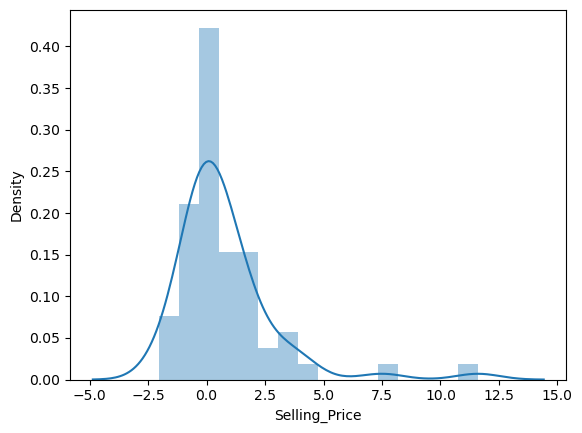

In [32]:
sns.distplot(y_test - y_pred)

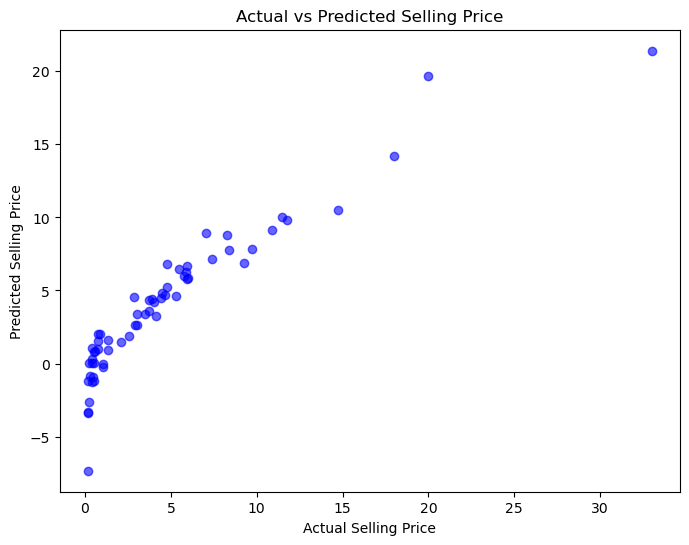

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

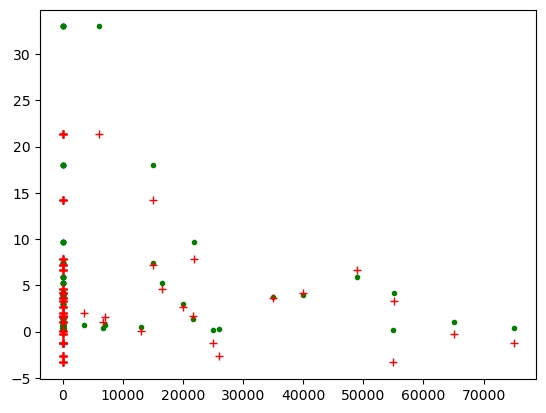

In [34]:
plt.plot(x_test[20:40], y_test[20:40], '.', color = 'green')
plt.plot(x_test[20:40], y_pred[20:40], '+', color = 'red')
plt.show()
# Red + represents Predicted values
# Green . represents Test values

In [35]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred_rf= rf.predict(x_test)

In [37]:
y_pred_rf[:10]

array([ 9.2106,  0.6594,  2.3905,  0.754 ,  5.186 ,  5.7621, 21.705 ,
        0.1672,  0.5531,  4.0785])

In [38]:
list(y_test[:10])

[8.4, 0.5, 2.55, 0.9, 4.8, 4.75, 19.99, 0.2, 0.75, 3.9]

In [39]:
print('MSE---->',metrics.mean_squared_error(y_test,y_pred_rf))
print('RMSE---->',np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

MSE----> 2.5499331998360644
RMSE----> 1.5968510261874977


In [40]:
print(r2_score(y_test, y_pred_rf))

0.9214610735205228


C:\Users\marwa\AppData\Local\Temp\ipykernel_21920\892111478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred_rf)


<Axes: xlabel='Selling_Price', ylabel='Density'>

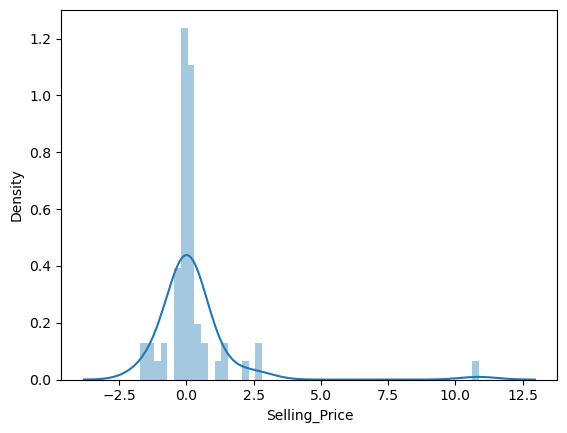

In [41]:
sns.distplot(y_test - y_pred_rf)

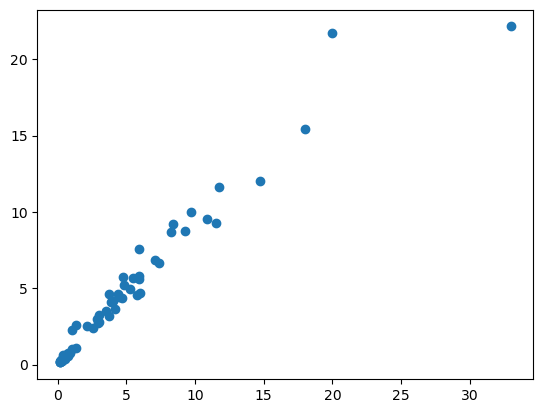

In [42]:
plt.scatter(y_test, y_pred_rf) 

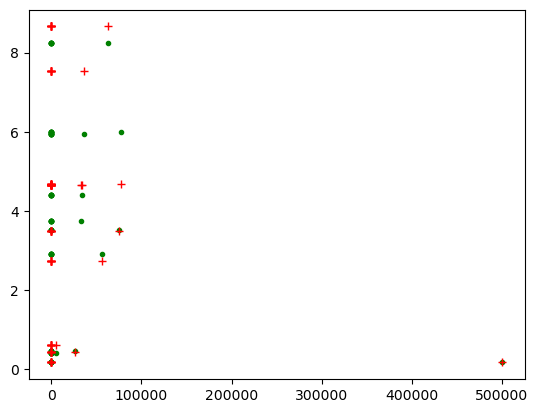

In [43]:
plt.plot(x_test[10:20], y_test[10:20], '.', color = 'green')
plt.plot(x_test[10:20], y_pred_rf[10:20], '+', color = 'red')
plt.show()

In [44]:
# Giving a test data of a 1st car in the above dataset.
Test = [[5.59,27000, 0, 10, 0, 1, 0,1]]
# Present_Price, Kms_Driven, Owner, No_of_Years, Fuel_Type_Diesel, Fuel_Type_Petrol, Seller_Type_Individual, Transmission_Manual
prediction = lr.predict(Test)
prediction1 = rf.predict(Test)

print(f"The actual cost of car is{df1.iloc[0:1,0:1]}, and predicted value of the same is {prediction} using Linear Regression", end = " \n")
print(f"The actual cost of car is{df1.iloc[0:1,0:1]}, and predicted value of the same is {prediction1} using Random Forest")

The actual cost of car is   Selling_Price
0           3.35, and predicted value of the same is [4.30115207] using Linear Regression 
The actual cost of car is   Selling_Price
0           3.35, and predicted value of the same is [3.887] using Random Forest


C:\Users\marwa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\marwa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

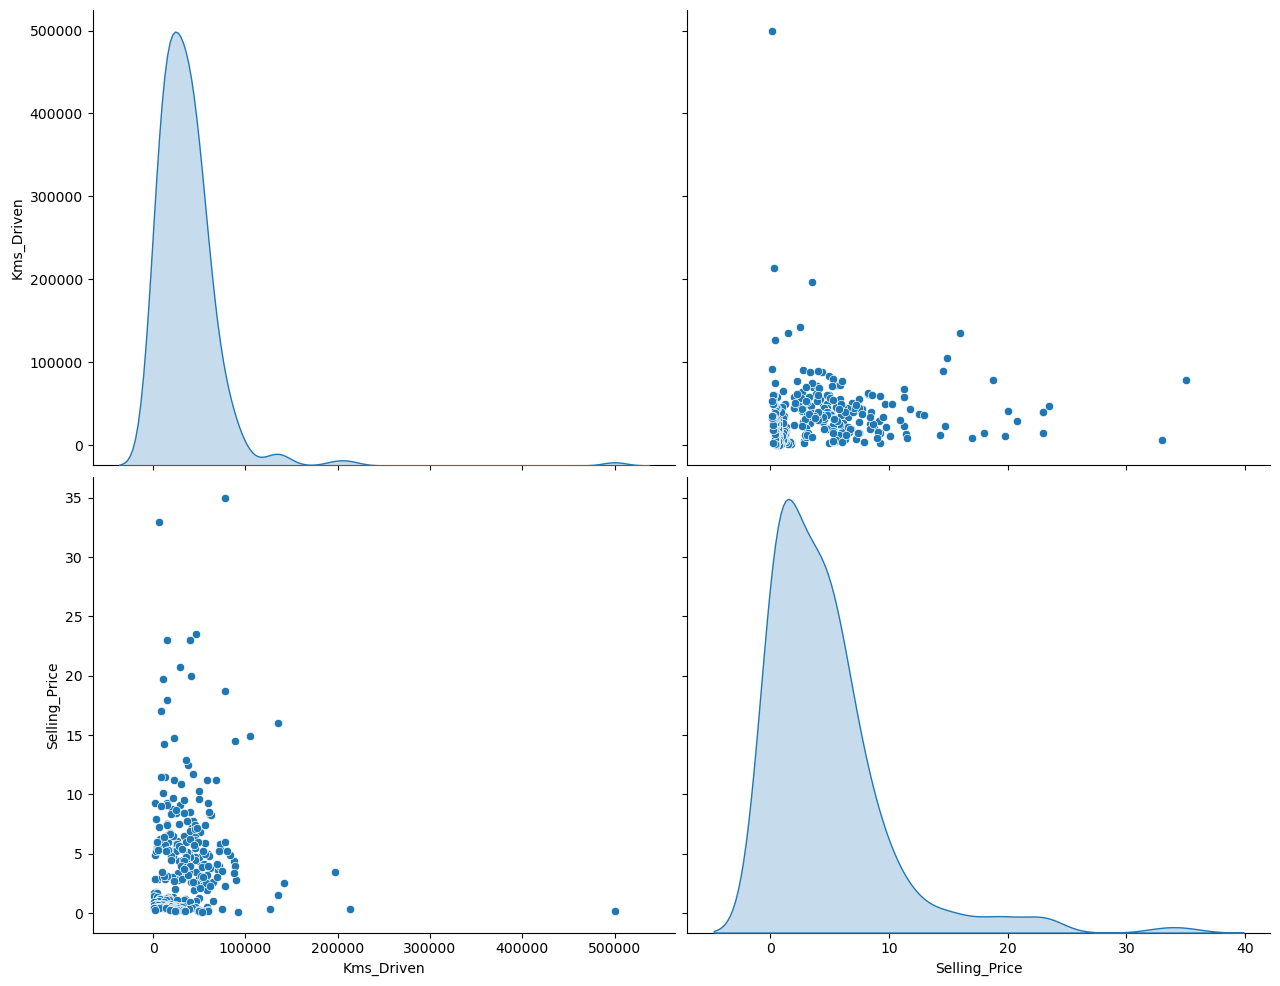

In [48]:
sns.pairplot(df , vars=['Kms_Driven' , 'Selling_Price']  ,diag_kind='kde' , height=5 , aspect=1.3 )

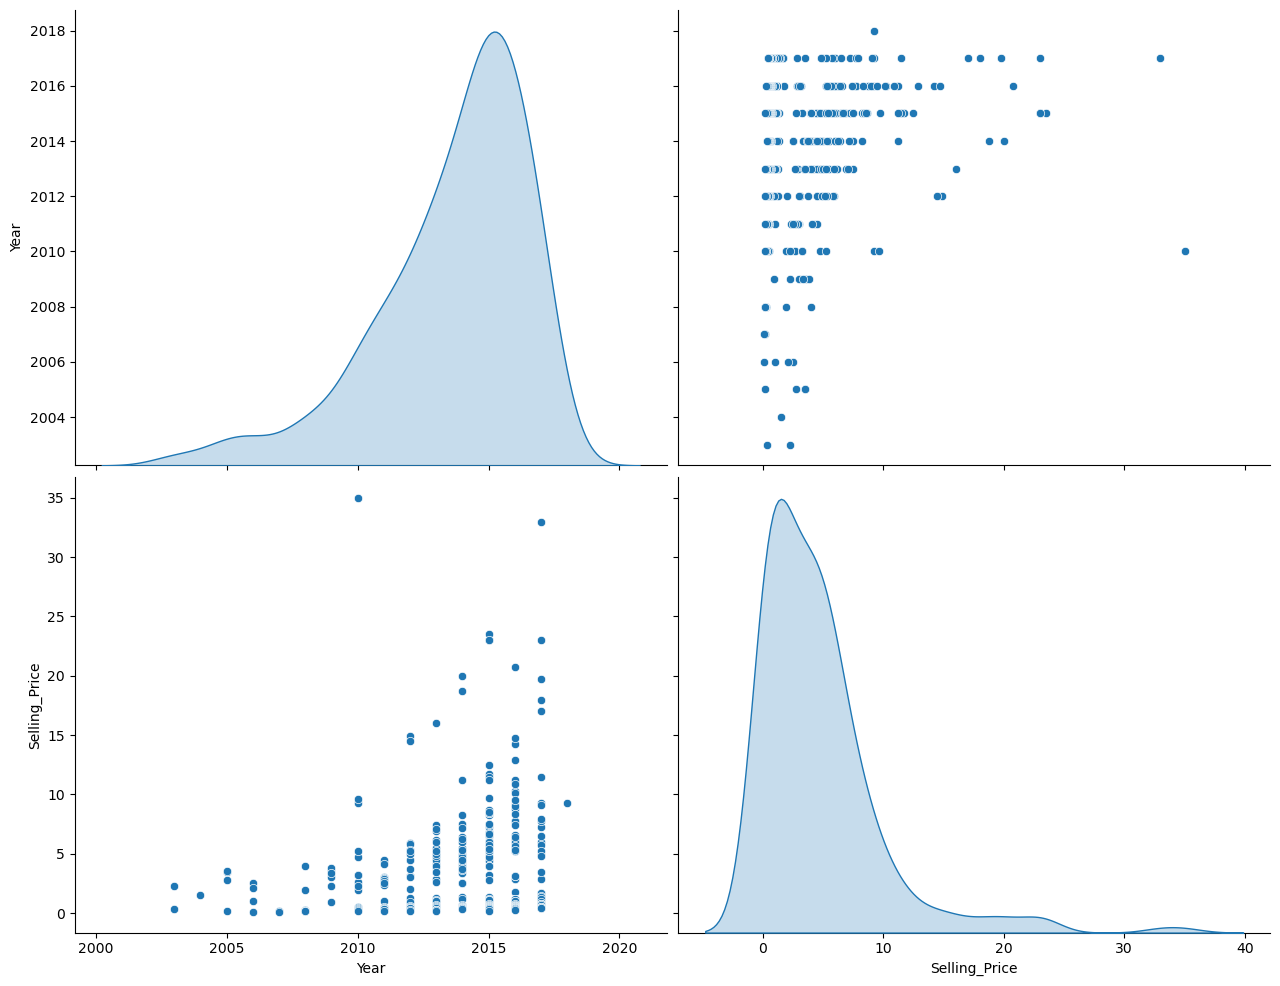

In [51]:
sns.pairplot(df , vars=['Year' , 'Selling_Price']  ,diag_kind='kde' , height=5 , aspect=1.3 )

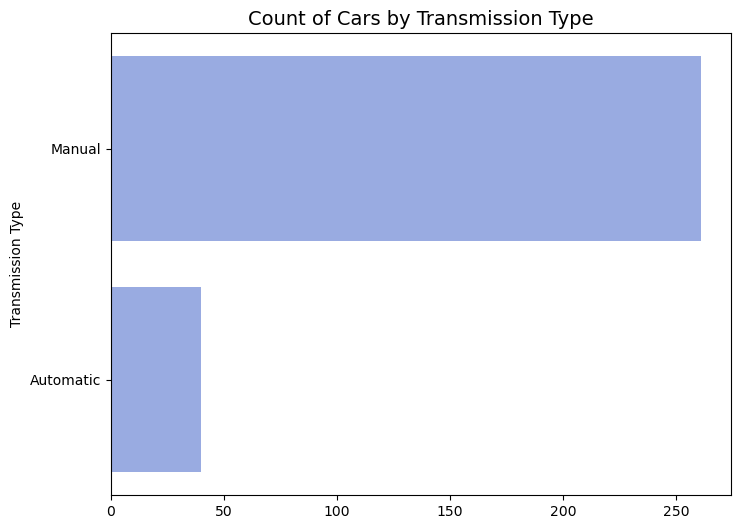

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='Transmission', color='royalblue', alpha=0.6)
plt.xlabel("")  
plt.ylabel("Transmission Type")
plt.title("Count of Cars by Transmission Type", fontsize=14) 
plt.show()

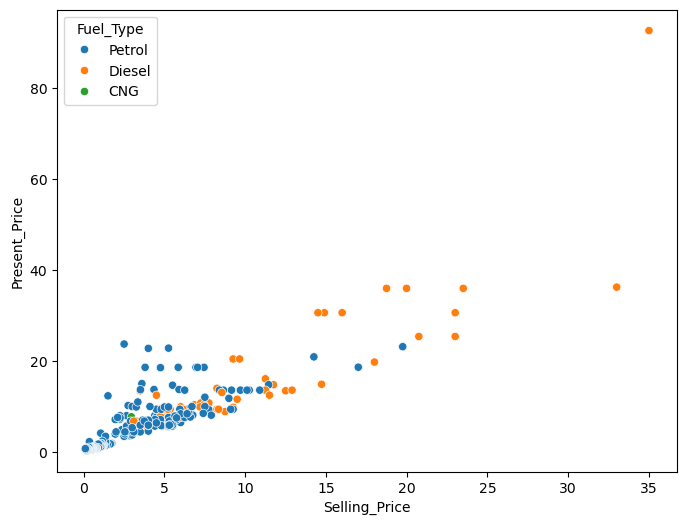

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df , x='Selling_Price', y='Present_Price'  ,hue='Fuel_Type') 
plt.show()

In [78]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


C:\Users\marwa\AppData\Local\Temp\ipykernel_21920\3054834263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fuel_Type', palette='cool')


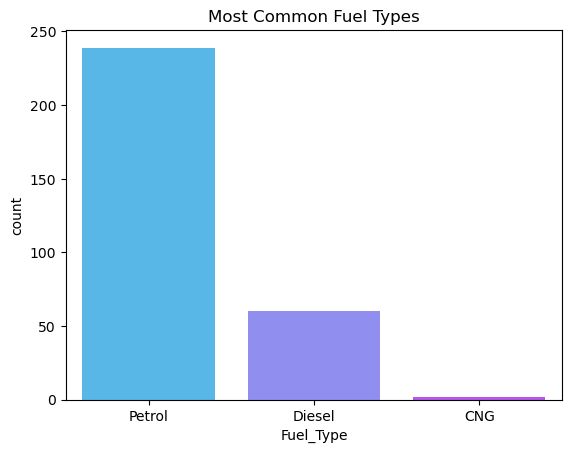

In [81]:
sns.countplot(data=df, x='Fuel_Type', palette='cool')
plt.title("Most Common Fuel Types")
plt.show()

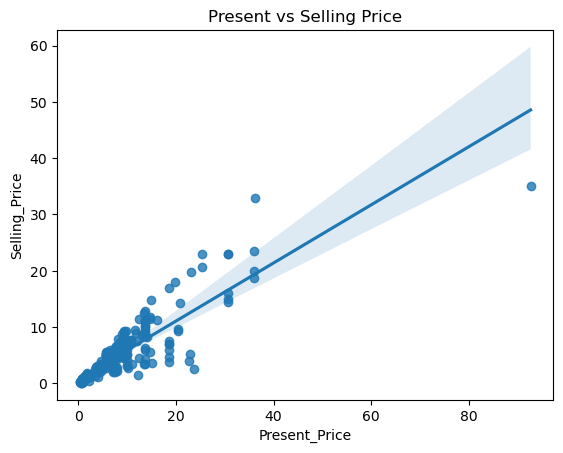

In [84]:
sns.regplot(data=df, x='Present_Price', y='Selling_Price')
plt.title("Present vs Selling Price")
plt.show()

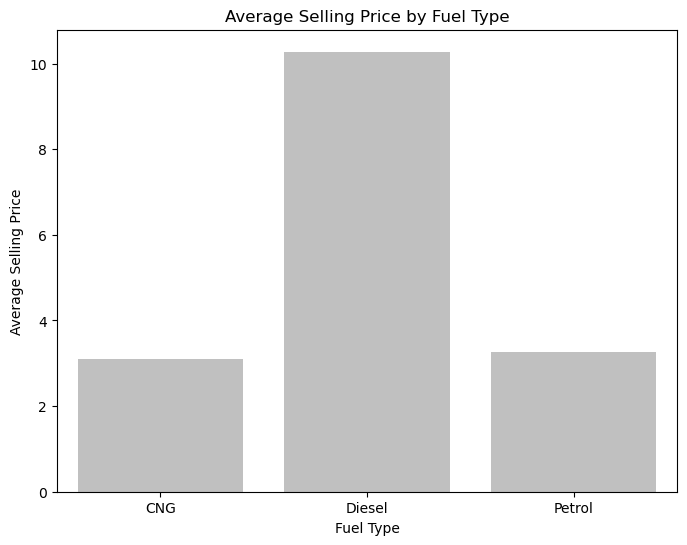

In [108]:
avg_price =df.groupby('Fuel_Type')['Selling_Price'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_price , x='Fuel_Type' , y='Selling_Price' , color='silver')
plt.title("Average Selling Price by Fuel Type")
plt.ylabel("Average Selling Price")
plt.xlabel("Fuel Type")
plt.show()

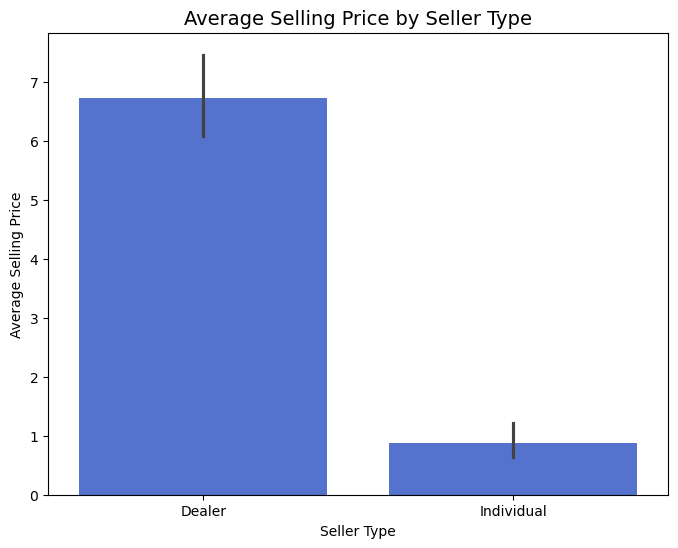

In [99]:
plt.figure(figsize=(8,6))
sns.barplot(data=df , x='Seller_Type' , y='Selling_Price' ,estimator='mean' ,color='royalblue')
plt.title("Average Selling Price by Seller Type", fontsize=14)
plt.ylabel("Average Selling Price")
plt.xlabel("Seller Type")
plt.show()

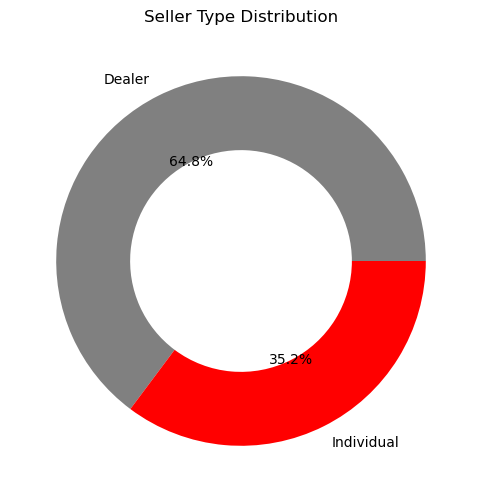

In [121]:
plt.figure(figsize=(6,6))
df['Seller_Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['grey','red'], wedgeprops=dict(width=0.4))
plt.title("Seller Type Distribution")
plt.ylabel("")
plt.show()

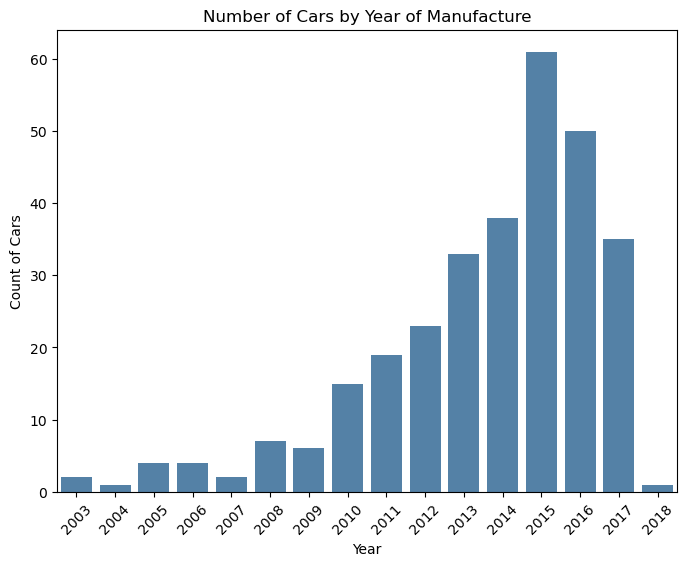

In [105]:
plt.figure(figsize=(8,6))
sns.countplot(data=df , x='Year',color='steelblue')
plt.title("Number of Cars by Year of Manufacture")
plt.xlabel("Year")
plt.ylabel("Count of Cars")
plt.xticks(rotation=45)
plt.show()

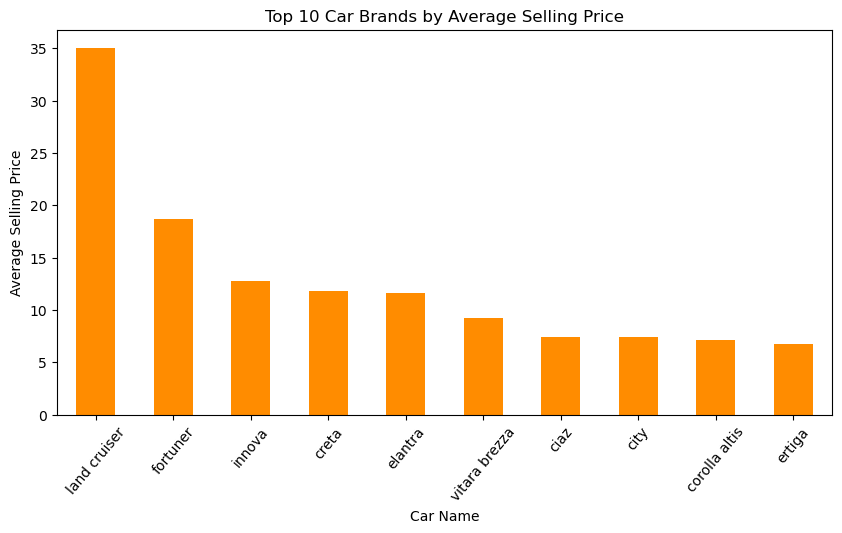

In [129]:
top_brands = df.groupby ('Car_Name')['Selling_Price'].mean().sort_values(ascending=False).nlargest(10)
top_brands.plot(kind='bar' , color='darkorange', figsize=(10,5))
plt.title("Top 10 Car Brands by Average Selling Price")
plt.ylabel("Average Selling Price")
plt.xlabel("Car Name")
plt.xticks(rotation=50)
plt.show()

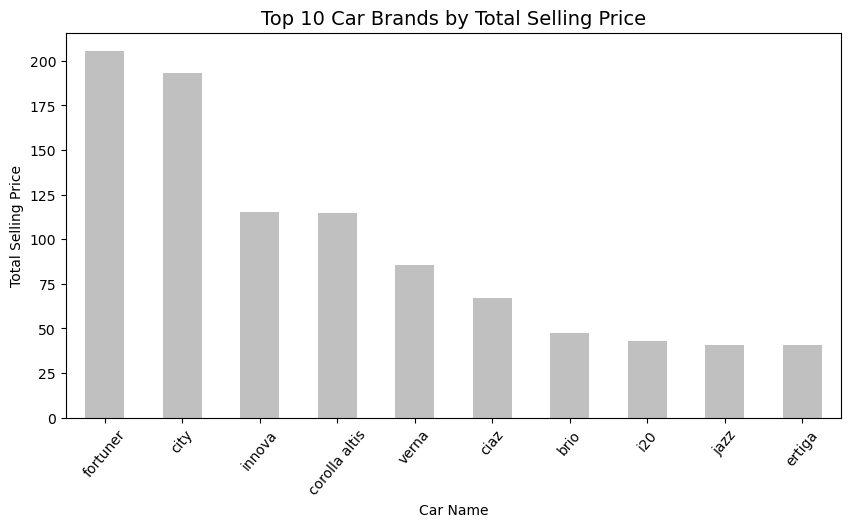

In [133]:
top_brands = df.groupby('Car_Name')['Selling_Price'].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_brands.plot(kind='bar', color='silver')
plt.title("Top 10 Car Brands by Total Selling Price", fontsize=14)
plt.ylabel("Total Selling Price")
plt.xlabel("Car Name")
plt.xticks(rotation=50)
plt.show()

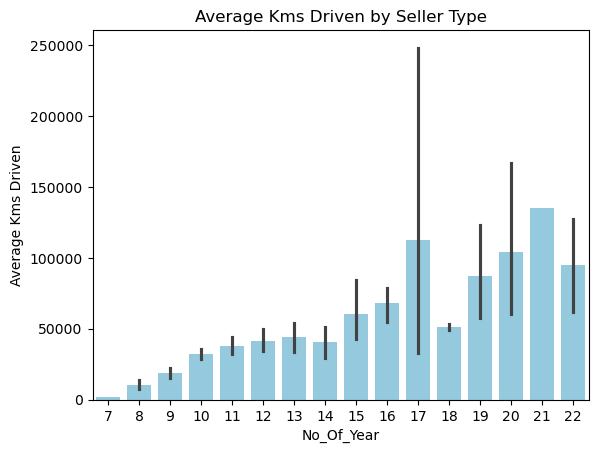

In [142]:
sns.barplot(data=df1, x='No_Of_Year', y='Kms_Driven', estimator='mean', color='skyblue')
plt.title("Average Kms Driven by Seller Type")
plt.ylabel("Average Kms Driven")
plt.show()

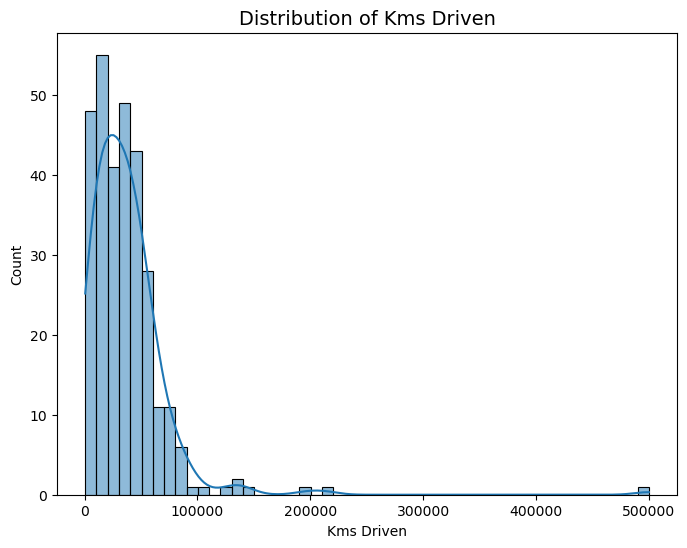

In [154]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Kms_Driven',  kde=True)
plt.title("Distribution of Kms Driven", fontsize=14)
plt.xlabel("Kms Driven")
plt.ylabel("Count")
plt.show()